#### Pass Task 2

##### 1. Load the "housing.csv" dataset and follow this link for the data description (features and target variable). Split the dataset in train and test set (use your choice of splitting). Train a linear regression model and report the performance (use your choice of at least 4 performance metric).

In [1]:
# Importing the necessary libraries

import numpy as np
import nbconvert
import warnings
warnings.simplefilter(action='ignore', category=Warning)
from sklearn import datasets
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression,LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score,plot_confusion_matrix,classification_report
from sklearn.svm import SVC,SVR
from sklearn.model_selection import train_test_split,KFold,StratifiedKFold,GridSearchCV,RandomizedSearchCV
from sklearn.feature_selection import VarianceThreshold
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier,RandomForestRegressor
from sklearn.manifold import TSNE
from feature_engine.selection import DropConstantFeatures,DropCorrelatedFeatures,DropDuplicateFeatures,SmartCorrelatedSelection
from sklearn.pipeline import Pipeline
import plotly.express as px
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score,f1_score,plot_confusion_matrix,roc_auc_score

In [2]:
# Loading the housing datset
df = pd.read_csv('housing.csv')

# Checking the records in the dataset
df.head()

CRIM    ZN   INDUS   CHAS    NOX     RM   AGE     DIS   RAD   TAX  \
0  0.00632  18.0    2.31      0  0.538  6.575  65.2  4.0900     1   296   
1  0.02731   0.0    7.07      0  0.469  6.421  78.9  4.9671     2   242   
2  0.02729   0.0    7.07      0  0.469  7.185  61.1  4.9671     2   242   
3  0.03237   0.0    2.18      0  0.458  6.998  45.8  6.0622     3   222   
4  0.06905   0.0    2.18      0  0.458  7.147  54.2  6.0622     3   222   

    PTRATIO       B   LSTAT   MEDV  
0      15.3  396.90    4.98   24.0  
1      17.8  396.90    9.14   21.6  
2      17.8  392.83    4.03   34.7  
3      18.7  394.63    2.94   33.4  
4      18.7  396.90    5.33   36.2

In [3]:
# Checking the features column names
df.columns

Index([' CRIM', ' ZN', ' INDUS', ' CHAS', ' NOX', ' RM', ' AGE', ' DIS',
       ' RAD', ' TAX', ' PTRATIO', ' B', ' LSTAT', ' MEDV'],
      dtype='object')

In [4]:
# Stripping the extra spaces in the columns
df.columns = df.columns.str.strip()
df.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')

In [5]:
# Checking for null values
df.isna().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [6]:
# Checking the datatype of each features
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


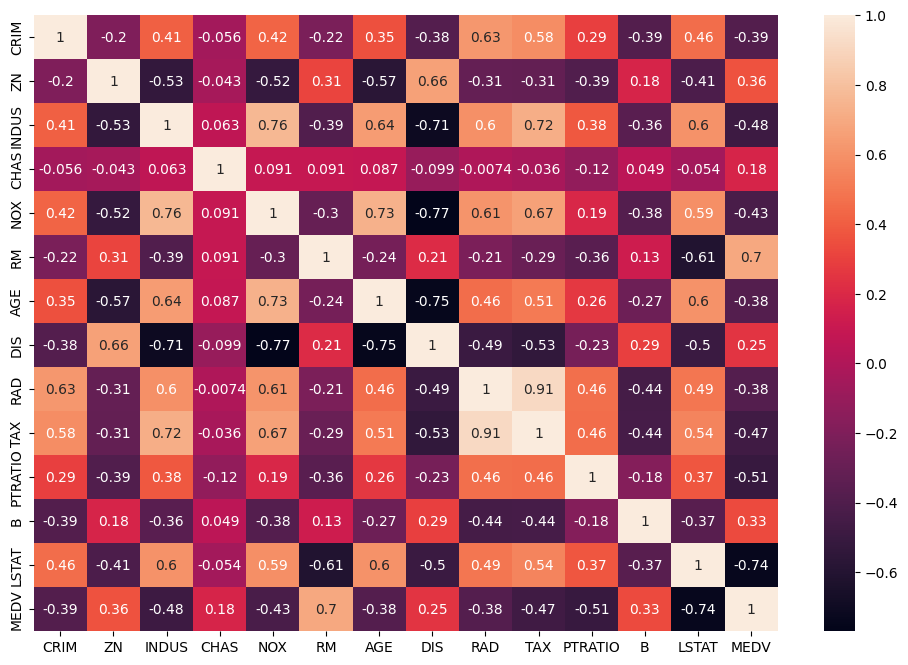

In [7]:
# Checking the correlated features 
plt.figure(figsize = (12,8))
sns.heatmap(df.corr(),annot=True)
plt.show()

The dataset hase correlated features

In [8]:
print("Checking the feature column values:-")
for column in df.columns:
    if df[column].nunique() < 30:
        print(f"{column} has {df[column].nunique()} values: \n{df[column].unique()}\n")
    else:
        print(f"{column} has {df[column].nunique()} values")


Checking the feature column values:-
CRIM has 504 values
ZN has 26 values: 
[ 18.    0.   12.5  75.   21.   90.   85.  100.   25.   17.5  80.   28.
  45.   60.   95.   82.5  30.   22.   20.   40.   55.   52.5  70.   34.
  33.   35. ]

INDUS has 76 values
CHAS has 2 values: 
[0 1]

NOX has 81 values
RM has 446 values
AGE has 356 values
DIS has 412 values
RAD has 9 values: 
[ 1  2  3  5  4  8  6  7 24]

TAX has 66 values
PTRATIO has 46 values
B has 357 values
LSTAT has 455 values
MEDV has 229 values


In [9]:
# Segmenting the data into features X and target y
X = df.iloc[:,:-1]
y = df['MEDV']

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [11]:
pipe1 = Pipeline([('constant',DropConstantFeatures(tol=0.9)),
                 ('duplicate',DropDuplicateFeatures()),
                 ('correlation',SmartCorrelatedSelection(selection_method='variance',threshold=0.45)),
                 ('scaler',StandardScaler()),
                 ])

In [12]:
# Fitting the pipeline 
pipe1.fit(X_train)

Pipeline(steps=[('constant', DropConstantFeatures(tol=0.9)),
                ('duplicate', DropDuplicateFeatures()),
                ('correlation',
                 SmartCorrelatedSelection(selection_method='variance',
                                          threshold=0.45)),
                ('scaler', StandardScaler())])

In [13]:
print(f"Constant or Quassi constant features to drop:-")
pipe1.named_steps.constant.features_to_drop_

Constant or Quassi constant features to drop:-


['CHAS']

In [14]:
print(f"Duplicate features to drop:-")
pipe1.named_steps.duplicate.features_to_drop_

Duplicate features to drop:-


set()

In [15]:
print(f"Correlated features to drop:-")
pipe1.named_steps.correlation.features_to_drop_

Correlated features to drop:-


['CRIM', 'ZN', 'INDUS', 'NOX', 'RM', 'DIS', 'RAD']

In [16]:
# transform the X_train,X_test data using fitted pipeline to get necesaary features for training
X_train = pipe1.transform(X_train)
X_test = pipe1.transform(X_test)

In [17]:
# Creating a function to create Regression model and return metrics
def create_regression_model(model_name,model,X_train,X_test,y_train,y_test):
    
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    
    # if model_type == 1:
    print(f"Training_score: {model.score(X_train,y_train)}")
    print(f"Testing_score: {model.score(X_test,y_test)}")
    print(f"root_mean_squared_error: {mean_squared_error(y_test,y_pred,squared=False)}")
    print(f"mean_absolute_error: {mean_absolute_error(y_test,y_pred)}")
    
    df = pd.DataFrame({'Model':[model_name],
                       'Training_score':[model.score(X_train,y_train)],
                       'Testing_score':[model.score(X_test,y_test)],
                       'root_mean_squared_error':[mean_squared_error(y_test,y_pred,squared=False)],
                        'mean_absolute_error':[mean_absolute_error(y_test,y_pred)]})
    return df,model

In [18]:
# Creating a function to create classifcation model and return metrics

def create_classification_model(model_name,model,X_train,X_test,y_train,y_test):
    
    
    if y_train.nunique() > 2:
        
        model.fit(X_train,y_train)
        y_pred_probs = model.predict_proba(X_test)
        y_pred = model.predict(X_test)
        print(f"Training_accuracy_score: {accuracy_score(y_train,model.predict(X_train))}")
        print(f"Testing_accuracy_score: {accuracy_score(y_test,y_pred)}")
        print(f"f1_score: {f1_score(y_test,y_pred,average='weighted')}")
        print(f"roc_auc_score: {roc_auc_score(y_test,model.predict_proba(X_test),multi_class='ovr')}")
        print("\n---------Classification report----------\n")
        print(classification_report(y_test,y_pred))
        # classification_report = classification_report(y_test,y_pred)

        df = pd.DataFrame({'Model':[model_name],
                           'Training_accuracy_score':[accuracy_score(y_train,model.predict(X_train))],
                           'Testing_accuracy_score':[accuracy_score(y_test,y_pred)],
                           'roc_auc_score':[roc_auc_score(y_test,model.predict_proba(X_test),multi_class='ovr')],
                            'f1_score':[f1_score(y_test,y_pred,average='weighted')]})
        return df,model
    else:
        model.fit(X_train,y_train)
        y_pred_probs = model.predict_proba(X_test)
        y_pred = model.predict(X_test)
        print(f"Training_accuracy_score: {accuracy_score(y_train,model.predict(X_train))}")
        print(f"Testing_accuracy_score: {accuracy_score(y_test,y_pred)}")
        print(f"f1_score: {f1_score(y_test,y_pred)}")
        print(f"roc_auc_score: {roc_auc_score(y_test,model.predict_proba(X_test)[:,1])}")
        print("\n---------Classification report----------\n")
        print(classification_report(y_test,y_pred))
        # classification_report = classification_report(y_test,y_pred)


        df = pd.DataFrame({'Model':[model_name],
                           'Training_accuracy_score':[accuracy_score(y_train,model.predict(X_train))],
                           'Testing_accuracy_score':[accuracy_score(y_test,y_pred)],
                           'roc_auc_score':[roc_auc_score(y_test,model.predict_proba(X_test)[:,1])],
                            'f1_score':[f1_score(y_test,y_pred)]})
        return df,model

In [19]:
lr = LinearRegression()
lr_df,_ = create_regression_model('LinearRegression',lr,X_train,X_test,y_train,y_test)
lr_df

Training_score: 0.6272241016065379
Testing_score: 0.5883231761671285
root_mean_squared_error: 5.58167429712542
mean_absolute_error: 4.076435843998948


Model  Training_score  Testing_score  root_mean_squared_error  \
0  LinearRegression        0.627224       0.588323                 5.581674   

   mean_absolute_error  
0             4.076436

<br>

##### 2. Apply PCA on the dataset and select the first three principal components. Split the dataset into train and test using the same method used in Q1. Compare the performance of this model with the performance obtained in Q1. Explain the outcome.

In [20]:
X = df.iloc[:,:-1]
y = df['MEDV']

In [21]:
# scaling the values to use PCA model
scaler = StandardScaler()
scaled_X = scaler.fit_transform(X)

In [22]:

# Applying pca on the whole dataset
pca = PCA()
pca_df_pred = pca.fit_transform(scaled_X)
pca_df_pred[:5]


array([[-2.09829747,  0.77311275,  0.34294273, -0.89177403,  0.42307036,
        -0.31533814,  0.31864075,  0.2958318 , -0.42493682,  0.64020641,
        -0.03300036,  0.01944023,  0.36597533],
       [-1.45725167,  0.59198521, -0.69519931, -0.48745853, -0.19587567,
         0.26422321,  0.55386126, -0.22366994, -0.16696207,  0.08423646,
        -0.64080983, -0.12579741, -0.07071949],
       [-2.07459756,  0.5996394 ,  0.1671216 , -0.73920419, -0.93453406,
         0.44809462,  0.48455996,  0.10516613,  0.06977513, -0.18038003,
        -0.48755672,  0.13332653, -0.0140218 ],
       [-2.61150357, -0.00687062, -0.10028413, -0.34372124, -1.10495596,
         0.6646495 ,  0.62264086,  0.25594078, -0.34224574,  0.04590132,
        -0.36020874,  0.50867761,  0.00784692],
       [-2.45818501,  0.09771195, -0.07534821, -0.42790688, -1.06592426,
         0.6170472 ,  0.70508599, -0.13452405, -0.41766778, -0.1408798 ,
        -0.39514988,  0.49773174,  0.01427426]])

In [23]:
# Extracting first 3 components of pca transformed dataset above
pca_df_pred_df = pd.DataFrame(pca_df_pred[:,0:3],columns=['pc1','pc2','pc3'])
pca_df_pred_df['MEDV'] = y
pca_df_pred_df.head()

pc1       pc2       pc3  MEDV
0 -2.098297  0.773113  0.342943  24.0
1 -1.457252  0.591985 -0.695199  21.6
2 -2.074598  0.599639  0.167122  34.7
3 -2.611504 -0.006871 -0.100284  33.4
4 -2.458185  0.097712 -0.075348  36.2

In [24]:
X_train, X_test, y_train, y_test = train_test_split(pca_df_pred_df.iloc[:,:-1], y, test_size=0.3, random_state=42)

# pca = PCA()
# pca_df_pred = pca.fit_transform(X_train)
lr = LinearRegression()
lr_df_pca,_ = create_regression_model('Linear_regression_pca_data',lr,X_train,X_test,y_train,y_test)
lr_df_pca

Training_score: 0.6453512074062179
Testing_score: 0.5989363441365806
root_mean_squared_error: 5.46667124657676
mean_absolute_error: 3.589145509775861


Model  Training_score  Testing_score  \
0  Linear_regression_pca_data        0.645351       0.598936   

   root_mean_squared_error  mean_absolute_error  
0                 5.466671             3.589146

In [25]:
result_df = lr_df.append(lr_df_pca)
result_df

Model  Training_score  Testing_score  \
0            LinearRegression        0.627224       0.588323   
0  Linear_regression_pca_data        0.645351       0.598936   

   root_mean_squared_error  mean_absolute_error  
0                 5.581674             4.076436  
0                 5.466671             3.589146

From above comparison, we can see that by reducing the feature space, we are getting better / Comparable score when using PCA on the dataset. This also helps in reducing model complexity<br>
The performance metrics (MSE, R2, MAE, etc) for the PCA model are significantly  comparable to those of the non-PCA model, it indicates that the reduced-dimensional representation captured by PCA is informative enough for the linear regression model to make accurate predictions. PCA might have effectively captured the essential variance in the data, leading to a more efficient and compact model

##### 3. Load "IRIS " datasets from SKlearn and follow this link for the data description (features and target variable). Apply PCA on the dataset and select the first three principal components. Split the dataset in train and test set (use your choice of splitting). Train a logistic regression model and report the performance (use your choice of at least 4 performance metric).

In [26]:
# Loading Iris dataset
iris = datasets.load_iris(as_frame=True)
iris_df = iris['frame']
iris_df.head()

sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target  
0       0  
1       0  
2       0  
3       0  
4       0

In [27]:
print(f"Shape of dataset:{iris_df.shape}")

Shape of dataset:(150, 5)


In [28]:
# Segregating the dataset to use pca
X = iris_df.iloc[:,:-1]
X.head()

sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2

In [29]:
scaler = StandardScaler()
scaled_X = scaler.fit_transform(X)
scaled_X[:5]

array([[-0.90068117,  1.01900435, -1.34022653, -1.3154443 ],
       [-1.14301691, -0.13197948, -1.34022653, -1.3154443 ],
       [-1.38535265,  0.32841405, -1.39706395, -1.3154443 ],
       [-1.50652052,  0.09821729, -1.2833891 , -1.3154443 ],
       [-1.02184904,  1.24920112, -1.34022653, -1.3154443 ]])

In [30]:
# Applying PCA on whole datset
pca = PCA()
pca_transform = pca.fit_transform(scaled_X)
pca_transform[:5]

array([[-2.26470281,  0.4800266 , -0.12770602, -0.0241682 ],
       [-2.08096115, -0.67413356, -0.23460885, -0.10300677],
       [-2.36422905, -0.34190802,  0.04420148, -0.02837705],
       [-2.29938422, -0.59739451,  0.09129011,  0.06595556],
       [-2.38984217,  0.64683538,  0.0157382 ,  0.03592281]])

In [31]:
# Selecting first 3 components of transformed pca
df_PC = pd.DataFrame(data = pca_transform[:,[0,1,2]],columns=['PC1','PC2','PC3'])
df_PC.head()

PC1       PC2       PC3
0 -2.264703  0.480027 -0.127706
1 -2.080961 -0.674134 -0.234609
2 -2.364229 -0.341908  0.044201
3 -2.299384 -0.597395  0.091290
4 -2.389842  0.646835  0.015738

In [32]:
iris_df_pc = pd.concat([iris_df,df_PC],axis = 1)
iris_df_pc.head(10)

sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   
5                5.4               3.9                1.7               0.4   
6                4.6               3.4                1.4               0.3   
7                5.0               3.4                1.5               0.2   
8                4.4               2.9                1.4               0.2   
9                4.9               3.1                1.5               0.1   

   target       PC1       PC2       PC3  
0       0 -2.264703  0.480027 -0.127706  
1       0 -2.080961 -0.674134 -0.234609  
2       0 -2.364229 -0.341908  0.044201  
3       0 -2.299384 -0.597395  0.091290  
4       0 -2.389842  0.646835  0.015738  
5       0 -2.075631  1.489178  0.026968  
6       0 -2.444029  0.047644  0.335470  
7       0 -2.232847  0.223148 -0.088695  
8       0 -2.334640 -1.115328  0.145077  
9       0 -2.184328 -0.469014 -0.253766

In [33]:
# iris_df_pc

In [34]:
X = iris_df_pc[['PC1','PC2','PC3']]
y = iris_df_pc['target']
X.shape, y.shape

((150, 3), (150,))

In [35]:
# SPlitting the dateset into train and test set
# X_train, X_test, y_train, y_test = train_test_split(pca_transform, y, test_size=0.3, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [36]:
# training a logistic regression on pca transformed data
logit = LogisticRegression(multi_class='ovr')
# lr.fit(X_train,y_train)
logit_df,_ = create_classification_model('Logistic_regression_pca_data',logit,X_train,X_test,y_train,y_test)
logit_df

Training_accuracy_score: 0.9142857142857143
Testing_accuracy_score: 0.9111111111111111
f1_score: 0.9089562289562289
roc_auc_score: 0.9791666666666666

---------Classification report----------

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      0.69      0.82        13
           2       0.76      1.00      0.87        13

    accuracy                           0.91        45
   macro avg       0.92      0.90      0.89        45
weighted avg       0.93      0.91      0.91        45



Model  Training_accuracy_score  \
0  Logistic_regression_pca_data                 0.914286   

   Testing_accuracy_score  roc_auc_score  f1_score  
0                0.911111       0.979167  0.908956

<br>

##### 4. Apply L1 or L2 regulariser on the logistic regression model developed using the same train and test data used in Q3 and calculate performance of the new model. Compare performance of this model with the performance reported in Q3. Explain the outcome.

In [37]:
# training a logistic regression on pca transformed data
logit_l1 = LogisticRegression(penalty='l1',multi_class='ovr',solver='saga')
# lr.fit(X_train,y_train)
logit_l1_df,_ = create_classification_model('Logistic_regression_pca_data_L1_regularisation',logit_l1,X_train,X_test,y_train,y_test)

Training_accuracy_score: 0.9333333333333333
Testing_accuracy_score: 0.9555555555555556
f1_score: 0.9552910052910052
roc_auc_score: 0.9935897435897436

---------Classification report----------

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      0.85      0.92        13
           2       0.87      1.00      0.93        13

    accuracy                           0.96        45
   macro avg       0.96      0.95      0.95        45
weighted avg       0.96      0.96      0.96        45



In [38]:
result_df = logit_df.append(logit_l1_df)
result_df

Model  Training_accuracy_score  \
0                    Logistic_regression_pca_data                 0.914286   
0  Logistic_regression_pca_data_L1_regularisation                 0.933333   

   Testing_accuracy_score  roc_auc_score  f1_score  
0                0.911111       0.979167  0.908956  
0                0.955556       0.993590  0.955291

From above comparison, we can see that by reducing the feature space, we are getting better score when using L1 regularisation on the dataset. This also helps in reducing model generalisation<br>
The performance metrics for the logistic regression model with L1 regularization are similar to or better than the model without regularization, it suggests that L1 regularization successfully reduced the impact of irrelevant features and improved the model's performance.  In some cases, the performance metrics may not change significantly with regularization. This could mean that the original model was not overfitting, or that the dataset is not complex enough to benefit from regularization.<br>
Here we see that Logistic Regression using L1 regulrisation is able to improve the model performace by increasing the accuracy, roc_auc_score and f1_score as compared to scores without using regularisation of Logistic Regression

<br>

##### 5. Load "digits" datasets from SKlearn and print the dimension of the dataset. Apply PCA on the dataset and select first three components. Print the dimension of modified dataset and visualise the data using appropriate plotting tool/s.

In [39]:
# Loading the digits dataset from sklearn
digits = datasets.load_digits(as_frame=True)

In [40]:
digits_df = digits['frame']

In [41]:
digits_df.head()

pixel_0_0  pixel_0_1  pixel_0_2  pixel_0_3  pixel_0_4  pixel_0_5  \
0        0.0        0.0        5.0       13.0        9.0        1.0   
1        0.0        0.0        0.0       12.0       13.0        5.0   
2        0.0        0.0        0.0        4.0       15.0       12.0   
3        0.0        0.0        7.0       15.0       13.0        1.0   
4        0.0        0.0        0.0        1.0       11.0        0.0   

   pixel_0_6  pixel_0_7  pixel_1_0  pixel_1_1  ...  pixel_6_7  pixel_7_0  \
0        0.0        0.0        0.0        0.0  ...        0.0        0.0   
1        0.0        0.0        0.0        0.0  ...        0.0        0.0   
2        0.0        0.0        0.0        0.0  ...        0.0        0.0   
3        0.0        0.0        0.0        8.0  ...        0.0        0.0   
4        0.0        0.0        0.0        0.0  ...        0.0        0.0   

   pixel_7_1  pixel_7_2  pixel_7_3  pixel_7_4  pixel_7_5  pixel_7_6  \
0        0.0        6.0       13.0       10.0        0.0        0.0   
1        0.0        0.0       11.0       16.0       10.0        0.0   
2        0.0        0.0        3.0       11.0       16.0        9.0   
3        0.0        7.0       13.0       13.0        9.0        0.0   
4        0.0        0.0        2.0       16.0        4.0        0.0   

   pixel_7_7  target  
0        0.0       0  
1        0.0       1  
2        0.0       2  
3        0.0       3  
4        0.0       4  

[5 rows x 65 columns]

In [42]:
# Printing the dimensions of the dataset
print(f"Dimensions of the dataset : {digits_df.shape}")
print(f"Records of the dataset : {digits_df.shape[0]}")
print(f"Pixels as Features of the dataset : {digits_df.shape[1]}")

Dimensions of the dataset : (1797, 65)
Records of the dataset : 1797
Pixels as Features of the dataset : 65


In [43]:
digits_df.iloc[:,:-1].iloc[0].values.reshape(8,8)

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

In [44]:
digits_df.iloc[0,-1]

0

Prining the image of the first record:0


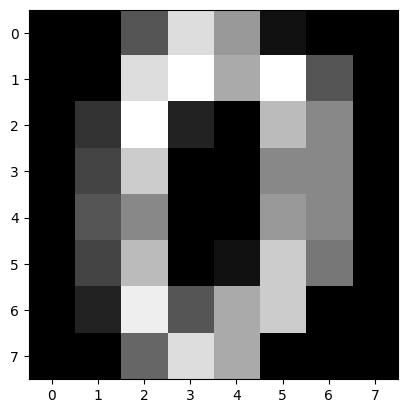

In [45]:
print(f"Prining the image of the first record:{digits_df.iloc[0,-1]}")
image = digits_df.iloc[:,:-1].iloc[0].values.reshape(8,8)
plt.imshow(image,cmap = 'gray');

In [46]:
digits_df.head(1)

pixel_0_0  pixel_0_1  pixel_0_2  pixel_0_3  pixel_0_4  pixel_0_5  \
0        0.0        0.0        5.0       13.0        9.0        1.0   

   pixel_0_6  pixel_0_7  pixel_1_0  pixel_1_1  ...  pixel_6_7  pixel_7_0  \
0        0.0        0.0        0.0        0.0  ...        0.0        0.0   

   pixel_7_1  pixel_7_2  pixel_7_3  pixel_7_4  pixel_7_5  pixel_7_6  \
0        0.0        6.0       13.0       10.0        0.0        0.0   

   pixel_7_7  target  
0        0.0       0  

[1 rows x 65 columns]

In [47]:
# Extrating the column features pixels from the dataset
digits_df_predictors = digits_df.iloc[:,:-1]
digits_df_predictors

pixel_0_0  pixel_0_1  pixel_0_2  pixel_0_3  pixel_0_4  pixel_0_5  \
0           0.0        0.0        5.0       13.0        9.0        1.0   
1           0.0        0.0        0.0       12.0       13.0        5.0   
2           0.0        0.0        0.0        4.0       15.0       12.0   
3           0.0        0.0        7.0       15.0       13.0        1.0   
4           0.0        0.0        0.0        1.0       11.0        0.0   
...         ...        ...        ...        ...        ...        ...   
1792        0.0        0.0        4.0       10.0       13.0        6.0   
1793        0.0        0.0        6.0       16.0       13.0       11.0   
1794        0.0        0.0        1.0       11.0       15.0        1.0   
1795        0.0        0.0        2.0       10.0        7.0        0.0   
1796        0.0        0.0       10.0       14.0        8.0        1.0   

      pixel_0_6  pixel_0_7  pixel_1_0  pixel_1_1  ...  pixel_6_6  pixel_6_7  \
0           0.0        0.0        0.0        0.0  ...        0.0        0.0   
1           0.0        0.0        0.0        0.0  ...        0.0        0.0   
2           0.0        0.0        0.0        0.0  ...        5.0        0.0   
3           0.0        0.0        0.0        8.0  ...        9.0        0.0   
4           0.0        0.0        0.0        0.0  ...        0.0        0.0   
...         ...        ...        ...        ...  ...        ...        ...   
1792        0.0        0.0        0.0        1.0  ...        4.0        0.0   
1793        1.0        0.0        0.0        0.0  ...        1.0        0.0   
1794        0.0        0.0        0.0        0.0  ...        0.0        0.0   
1795        0.0        0.0        0.0        0.0  ...        2.0        0.0   
1796        0.0        0.0        0.0        2.0  ...        8.0        0.0   

      pixel_7_0  pixel_7_1  pixel_7_2  pixel_7_3  pixel_7_4  pixel_7_5  \
0           0.0        0.0        6.0       13.0       10.0        0.0   
1           0.0        0.0        0.0       11.0       16.0       10.0   
2           0.0        0.0        0.0        3.0       11.0       16.0   
3           0.0        0.0        7.0       13.0       13.0        9.0   
4           0.0        0.0        0.0        2.0       16.0        4.0   
...         ...        ...        ...        ...        ...        ...   
1792        0.0        0.0        2.0       14.0       15.0        9.0   
1793        0.0        0.0        6.0       16.0       14.0        6.0   
1794        0.0        0.0        2.0        9.0       13.0        6.0   
1795        0.0        0.0        5.0       12.0       16.0       12.0   
1796        0.0        1.0        8.0       12.0       14.0       12.0   

      pixel_7_6  pixel_7_7  
0           0.0        0.0  
1           0.0        0.0  
2           9.0        0.0  
3           0.0        0.0  
4           0.0        0.0  
...         ...        ...  
1792        0.0        0.0  
1793        0.0        0.0  
1794        0.0        0.0  
1795        0.0        0.0  
1796        1.0        0.0  

[1797 rows x 64 columns]

In [48]:
# standardising the datset
scaler = StandardScaler()
scaled_digits_df_predictors = scaler.fit_transform(digits_df_predictors)

In [49]:
#applying PCA on the whole dataset predictors
pca_digits = PCA()
pca_transformed_digits_df_predictors = pca_digits.fit_transform(scaled_digits_df_predictors)


In [50]:
# pca_digits.components_

In [51]:
# Taking first 3 components
pca_transformed_digits_df_predictors_df = pd.DataFrame(pca_transformed_digits_df_predictors[:,[0,1,2]],
                                                       columns=['pc1','pc2','pc3'])
pca_transformed_digits_df_predictors_df.head()

pc1       pc2       pc3
0  1.914214 -0.954502 -3.946035
1  0.588980  0.924636  3.924755
2  1.302039 -0.317189  3.023333
3 -3.020770 -0.868772 -0.801744
4  4.528949 -1.093480  0.973121

In [52]:
print(f"Dimensions of the modified dataset: {pca_transformed_digits_df_predictors_df.shape}")

Dimensions of the modified dataset: (1797, 3)


<Axes: xlabel='pc1', ylabel='pc2'>

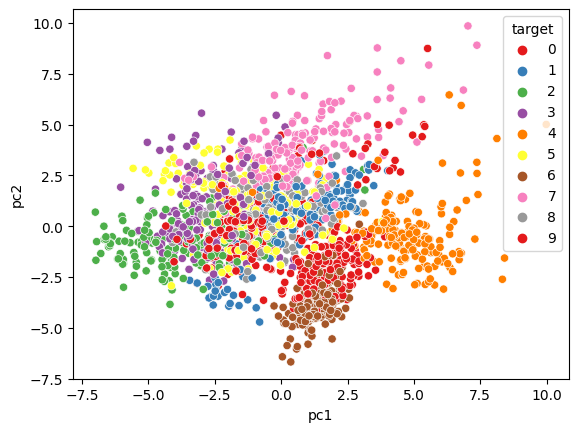

In [53]:
# Visualizing the transformed datset using 2 pincial componets and 
# grouping them using the appropriate  labels using hue paramet
sns.scatterplot(data = pca_transformed_digits_df_predictors_df,
                x = pca_transformed_digits_df_predictors_df['pc1'],
               y = pca_transformed_digits_df_predictors_df['pc2'],
               hue = digits_df.iloc[:,-1],palette='Set1')

From above plot, we can see that using 2 principal components , the PCA is able distinguish the digits.

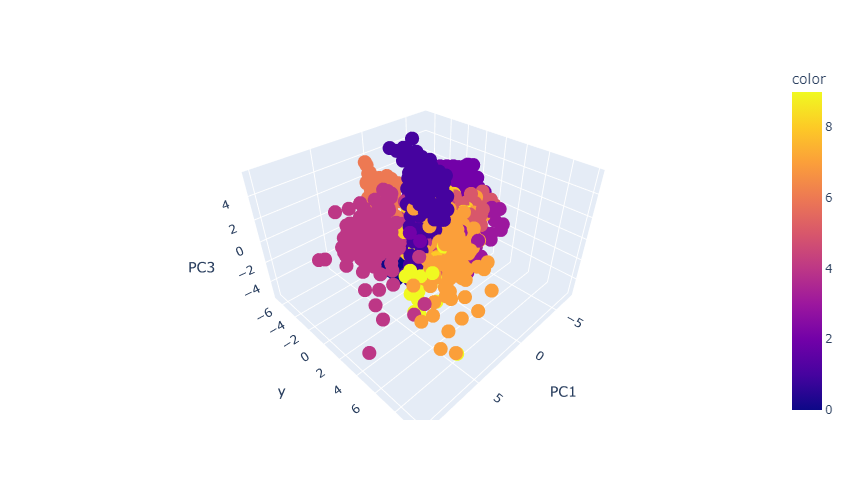

In [54]:
import plotly.express as px
# df = px.data.iris()
x = pca_transformed_digits_df_predictors_df['pc1']
y = pca_transformed_digits_df_predictors_df['pc2']
z = pca_transformed_digits_df_predictors_df['pc3']
fig = px.scatter_3d(x=x, y=y,
                 z=z,
              color= digits_df.iloc[:,-1],height=500,width=700,
                   labels={"x":"PC1","Y":"PC2","z":"PC3"})
fig.show()

From above plot, we can see that using 3 principal components , the PCA is also able distinguish the digits.

<br>

##### 6. Classify the digit classes available in the dataset (use the modified dataset) using SVM with RBF kernel. Select appropriate data splitting approach and performance metrics. Report the performances and the used model hyper-parameters.

In [55]:
pca_transformed_digits_df_full = pd.concat([pca_transformed_digits_df_predictors_df,digits_df.iloc[:,-1]],axis = 1)
pca_transformed_digits_df_full.head(10)

pc1       pc2       pc3  target
0  1.914214 -0.954502 -3.946035       0
1  0.588980  0.924636  3.924755       1
2  1.302039 -0.317189  3.023333       2
3 -3.020770 -0.868772 -0.801744       3
4  4.528949 -1.093480  0.973121       4
5 -1.301890 -1.148183 -1.574607       5
6  1.434222 -2.957845  2.831278       6
7  0.614240  5.462184  0.658242       7
8 -1.098451 -0.665823 -0.041023       8
9 -0.537970 -0.777493 -1.568922       9

In [56]:
X = pca_transformed_digits_df_full.iloc[:,0:3]
y = pca_transformed_digits_df_full['target']

In [57]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [58]:
np.arange(start=0.1, stop=5, step=0.1)

array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2, 1.3,
       1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. , 2.1, 2.2, 2.3, 2.4, 2.5, 2.6,
       2.7, 2.8, 2.9, 3. , 3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8, 3.9,
       4. , 4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8, 4.9])

In [59]:
svc = SVC(probability=True,kernel='rbf')

param_grid = {"C":np.arange(start=0.1, stop=5, step=0.1),
             # "degree":[2,3,4],
             'gamma' : [1,0.1,0.01,0.001]}

In [60]:
# kf = StratifiedKFold(n_splits=5,shuffle=True,random_state=42)
# grid = GridSearchCV(estimator=svc,param_grid=param_grid,
#                     cv = kf,return_train_score=True,verbose=1)
# grid.fit(X_train,y_train)
# y_pred = grid.predict(X_test)

kf = StratifiedKFold(n_splits=5,shuffle=True,random_state=42)
grid = GridSearchCV(estimator=svc,param_grid=param_grid,
                    cv = kf,return_train_score=True,verbose=1)
SVC_df,grid_svc_digits = create_classification_model('SVC',grid,X_train,X_test,y_train,y_test)
# grid.fit(X_train,y_train)
# y_pred = grid.predict(X_test)

Fitting 5 folds for each of 196 candidates, totalling 980 fits
Training_accuracy_score: 0.8003182179793158
Testing_accuracy_score: 0.7462962962962963
f1_score: 0.7357826318887575
roc_auc_score: 0.9628078052417208

---------Classification report----------

              precision    recall  f1-score   support

           0       0.89      0.92      0.91        53
           1       0.79      0.82      0.80        50
           2       0.85      0.85      0.85        47
           3       0.73      0.69      0.70        54
           4       0.95      0.95      0.95        60
           5       0.42      0.20      0.27        66
           6       1.00      0.92      0.96        53
           7       0.77      0.84      0.80        55
           8       0.44      0.63      0.52        43
           9       0.59      0.75      0.66        59

    accuracy                           0.75       540
   macro avg       0.74      0.76      0.74       540
weighted avg       0.74      0.75      0

In [61]:
SVC_df

Model  Training_accuracy_score  Testing_accuracy_score  roc_auc_score  \
0   SVC                 0.800318                0.746296       0.962808   

   f1_score  
0  0.735783

In [62]:
grid_results = pd.DataFrame(grid_svc_digits.cv_results_)
grid_results[['params','mean_test_score','rank_test_score']].sort_values(by = 'rank_test_score',ascending=True).head()

params  mean_test_score  rank_test_score
121                 {'C': 3.1, 'gamma': 0.1}         0.766942                1
109  {'C': 2.8000000000000003, 'gamma': 0.1}         0.766148                2
113  {'C': 2.9000000000000004, 'gamma': 0.1}         0.766148                2
125                 {'C': 3.2, 'gamma': 0.1}         0.766145                4
117  {'C': 3.0000000000000004, 'gamma': 0.1}         0.766145                4

In [63]:
print(f"Used hyperparametrs for the model:\n{grid_svc_digits.best_params_}")

Used hyperparametrs for the model:
{'C': 3.1, 'gamma': 0.1}


##### 7. Load "diabetes" datasets from SKlearn and print the dimension of the dataset. Apply tSNE method to reduce dimension and select first three components. Plot the selected components using appropriate visualisation technique.

In [64]:
diabetes = datasets.load_diabetes(as_frame=True)

In [65]:
diabetes.keys()

dict_keys(['data', 'target', 'frame', 'DESCR', 'feature_names', 'data_filename', 'target_filename', 'data_module'])

In [66]:
diabetes_df = diabetes['frame']
diabetes_df.head()

age       sex       bmi        bp        s1        s2        s3  \
0  0.038076  0.050680  0.061696  0.021872 -0.044223 -0.034821 -0.043401   
1 -0.001882 -0.044642 -0.051474 -0.026328 -0.008449 -0.019163  0.074412   
2  0.085299  0.050680  0.044451 -0.005671 -0.045599 -0.034194 -0.032356   
3 -0.089063 -0.044642 -0.011595 -0.036656  0.012191  0.024991 -0.036038   
4  0.005383 -0.044642 -0.036385  0.021872  0.003935  0.015596  0.008142   

         s4        s5        s6  target  
0 -0.002592  0.019908 -0.017646   151.0  
1 -0.039493 -0.068330 -0.092204    75.0  
2 -0.002592  0.002864 -0.025930   141.0  
3  0.034309  0.022692 -0.009362   206.0  
4 -0.002592 -0.031991 -0.046641   135.0

In [67]:
print(f"Dimension of the dataset:{diabetes_df.shape}")

Dimension of the dataset:(442, 11)


In [68]:
# defining a function to convert the numeric target column to category column value
# with 1 having diabetes and 0 having No diabetes
def map_value(value):
    if value > 140:
        return 1
    else:
        return 0
    
    
# Converting Sex  colum from numeric value to category value to visulise data easily
diabetes_df['diabetes'] = diabetes_df['target'].apply(map_value)

# Dropping the Sex column
# diabetes_df.drop(columns = ['sex'],inplace = True)

In [69]:
diabetes_df.head()

age       sex       bmi        bp        s1        s2        s3  \
0  0.038076  0.050680  0.061696  0.021872 -0.044223 -0.034821 -0.043401   
1 -0.001882 -0.044642 -0.051474 -0.026328 -0.008449 -0.019163  0.074412   
2  0.085299  0.050680  0.044451 -0.005671 -0.045599 -0.034194 -0.032356   
3 -0.089063 -0.044642 -0.011595 -0.036656  0.012191  0.024991 -0.036038   
4  0.005383 -0.044642 -0.036385  0.021872  0.003935  0.015596  0.008142   

         s4        s5        s6  target  diabetes  
0 -0.002592  0.019908 -0.017646   151.0         1  
1 -0.039493 -0.068330 -0.092204    75.0         0  
2 -0.002592  0.002864 -0.025930   141.0         1  
3  0.034309  0.022692 -0.009362   206.0         1  
4 -0.002592 -0.031991 -0.046641   135.0         0

In [70]:
# diabetes_df.iloc[:,:-2]

In [71]:
# Applying tsne using first 3 components
tsne = TSNE(n_components=3,random_state=42)
diabetes_tsne_transfom_df_predictors = tsne.fit_transform(diabetes_df.iloc[:,:-2])
diabetes_tsne_transfom_df_predictors = pd.DataFrame(diabetes_tsne_transfom_df_predictors,columns=['tsn1','tsn2','tsn3'])
diabetes_tsne_transfom_df_predictors.head()

tsn1        tsn2       tsn3
0 -65.880630  100.109970  26.341137
1  34.693195   20.111155  83.491890
2 -23.018808   51.337734 -85.507294
3  76.937759  -10.295616 -14.075912
4  22.845461  -13.064571  36.848789

In [72]:
diabetes_df.iloc[:,:-1].shape

(442, 11)

In [73]:
diabetes_tsne_transfom_df_predictors.head()

tsn1        tsn2       tsn3
0 -65.880630  100.109970  26.341137
1  34.693195   20.111155  83.491890
2 -23.018808   51.337734 -85.507294
3  76.937759  -10.295616 -14.075912
4  22.845461  -13.064571  36.848789

In [74]:
diabetes_tsne_transfom_df_full = pd.concat([diabetes_tsne_transfom_df_predictors,diabetes_df['diabetes']],axis = 1)
diabetes_tsne_transfom_df_full.head()

tsn1        tsn2       tsn3  diabetes
0 -65.880630  100.109970  26.341137         1
1  34.693195   20.111155  83.491890         0
2 -23.018808   51.337734 -85.507294         1
3  76.937759  -10.295616 -14.075912         1
4  22.845461  -13.064571  36.848789         0

<Axes: xlabel='tsn1', ylabel='tsn2'>

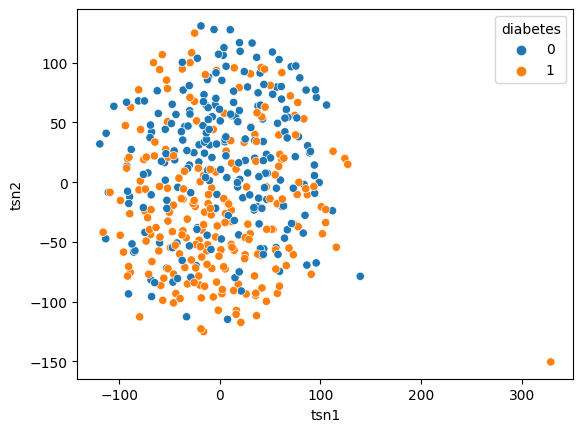

In [75]:
# Visualizing the tsne components using seaborn 
sns.scatterplot(data = diabetes_tsne_transfom_df_full,
               x = diabetes_tsne_transfom_df_full['tsn1'],
               y = diabetes_tsne_transfom_df_full['tsn2'],
               hue = diabetes_tsne_transfom_df_full['diabetes'])

Using first 2 tsne components,the data is visualized  in two dimensions and able to segregate based on gender

<br>

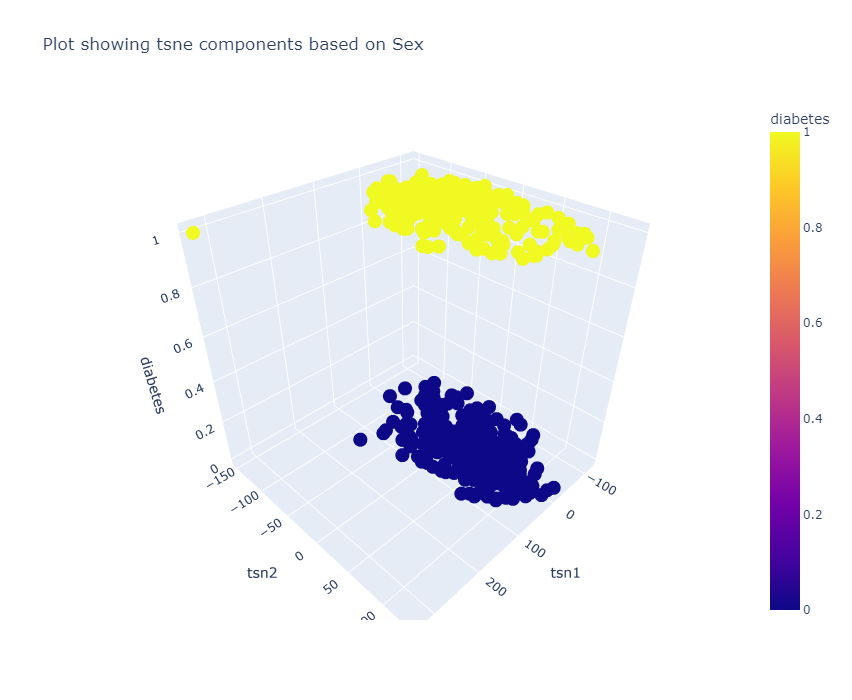

In [76]:
# Visualizing the all tsne components using plotly 

# import plotly.express as px
fig = px.scatter_3d(diabetes_tsne_transfom_df_full, x='tsn1', y='tsn2', z='diabetes',
              color='diabetes',width=800,height=700,title = 'Plot showing tsne components based on Sex')
fig.show()

Using all 3 tsne components,the data is visualized using all 3 components in three dimension and able to segregate based on gender

<br>

##### 8. Create a model for detecting diabetes using SVM with a poly kernel. Select appropriate data splitting approach and performance metrics. Report the performances and the used model hyper-parameters.

In [77]:
print("Checking the feature column values:-")
for column in diabetes_df.columns:
    if diabetes_df[column].nunique() < 30:
        print(f"{column} has {diabetes_df[column].nunique()} values: \n{diabetes_df[column].unique()}\n")
    else:
        print(f"{column} has {diabetes_df[column].nunique()} values")

Checking the feature column values:-
age has 58 values
sex has 2 values: 
[ 0.05068012 -0.04464164]

bmi has 163 values
bp has 100 values
s1 has 141 values
s2 has 302 values
s3 has 63 values
s4 has 66 values
s5 has 184 values
s6 has 56 values
target has 214 values
diabetes has 2 values: 
[1 0]



In [78]:
diabetes_df.head(2)

age       sex       bmi        bp        s1        s2        s3  \
0  0.038076  0.050680  0.061696  0.021872 -0.044223 -0.034821 -0.043401   
1 -0.001882 -0.044642 -0.051474 -0.026328 -0.008449 -0.019163  0.074412   

         s4        s5        s6  target  diabetes  
0 -0.002592  0.019908 -0.017646   151.0         1  
1 -0.039493 -0.068330 -0.092204    75.0         0

In [79]:
df = diabetes_df.copy()

In [80]:
# Segmenting the data into features X and target y
X = df.iloc[:,:-2]
y = df['diabetes']

In [81]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [82]:
pipe1 = Pipeline([('constant',DropConstantFeatures(tol=0.9)),
                 ('duplicate',DropDuplicateFeatures()),
                 ('correlation',SmartCorrelatedSelection(selection_method='variance',threshold=0.45)),
                 # ('scaler',StandardScaler()),
                 ])

In [83]:
pipe1.fit(X_train)

Pipeline(steps=[('constant', DropConstantFeatures(tol=0.9)),
                ('duplicate', DropDuplicateFeatures()),
                ('correlation',
                 SmartCorrelatedSelection(selection_method='variance',
                                          threshold=0.45))])

In [84]:
pipe1.named_steps.constant.features_to_drop_

[]

In [85]:
pipe1.named_steps.duplicate.features_to_drop_

set()

In [86]:
pipe1.named_steps.correlation.features_to_drop_

['s1', 's2', 's4']

In [87]:
print(f"Correlated features to drop: {pipe1.named_steps.correlation.features_to_drop_}")

Correlated features to drop: ['s1', 's2', 's4']


In [88]:
X_train = pipe1.transform(X_train)
X_test = pipe1.transform(X_test)

In [89]:
svc = SVC(kernel='poly',probability=True)

param_grid = {"C":np.arange(start=0.1, stop=3, step=0.1),
             "degree":[2,3,4,5],
             'gamma' : ['scale', 'auto']}
grid = GridSearchCV(estimator=svc,param_grid=param_grid,
                    verbose=1,cv = 5)

In [90]:
svc_df,grid_svc_diabetes = create_classification_model('SVC',grid,X_train,X_test,y_train,y_test)


Fitting 5 folds for each of 232 candidates, totalling 1160 fits
Training_accuracy_score: 0.8108108108108109
Testing_accuracy_score: 0.7465753424657534
f1_score: 0.7549668874172185
roc_auc_score: 0.8046992481203008

---------Classification report----------

              precision    recall  f1-score   support

           0       0.80      0.68      0.74        76
           1       0.70      0.81      0.75        70

    accuracy                           0.75       146
   macro avg       0.75      0.75      0.75       146
weighted avg       0.75      0.75      0.75       146



In [91]:
svc_df

Model  Training_accuracy_score  Testing_accuracy_score  roc_auc_score  \
0   SVC                 0.810811                0.746575       0.804699   

   f1_score  
0  0.754967

In [92]:
grid_results = pd.DataFrame(grid_svc_diabetes.cv_results_)
grid_results[['params','mean_test_score','rank_test_score']].sort_values(by = 'rank_test_score',ascending=True).head()

params  mean_test_score  \
138  {'C': 1.8000000000000003, 'degree': 3, 'gamma'...         0.749831   
146  {'C': 1.9000000000000001, 'degree': 3, 'gamma'...         0.749831   
130  {'C': 1.7000000000000002, 'degree': 3, 'gamma'...         0.749774   
114  {'C': 1.5000000000000002, 'degree': 3, 'gamma'...         0.749774   
122          {'C': 1.6, 'degree': 3, 'gamma': 'scale'}         0.746384   

     rank_test_score  
138                1  
146                1  
130                3  
114                3  
122                5

In [93]:
print(f"Used hyperparametrs for the model:\n{grid_svc_diabetes.best_params_}")

Used hyperparametrs for the model:
{'C': 1.8000000000000003, 'degree': 3, 'gamma': 'scale'}


<br>

##### 9. Based on the model hyper-parameters used in Q6 and Q8, share your understanding of hyper-parameters tuning in ML model development.

Hyperparameters are parameters whose values control the learning process and determine the values of model parameters that a learning algorithm ends up learning. The prefix 'hyper_' suggests that they are 'top-level' parameters that control the learning process and the model parameters that result from it.

Generally when a model is trained using default parameters, then all the parameters used are same, but when hyperparameter tuning is done, the model is run and trained on different values of the parameters

In question 6 for predicting classes of digit, SVM is used and in question 8 same SVM is used for predictiong diabetes.But both used different parameters as their hyperparameters to control learning process and get optimal results
This can be seen in below parameters as we have different hyperparameters based on the problem we are solving

In [94]:
grid_svc_diabetes.best_params_

{'C': 1.8000000000000003, 'degree': 3, 'gamma': 'scale'}

In [95]:
# pd.DataFrame({'C':[0.1],'degree':[2],'gamma':[1]})

In [96]:
grid_svc_digits.best_params_

{'C': 3.1, 'gamma': 0.1}

Hyperparameters are configuration options that are set before training a model, and they control the learning process. The choice of hyperparameters can significantly impact the model's performance and generalization capabilities. In the context of SVMs, some common hyperparameters include: Kernel Type: The type of kernel function to use (e.g., linear, polynomial, RBF). The choice of kernel determines the non-linear mapping of the data. Regularization Parameter (C): The regularization parameter C balances the trade-off between maximizing the margin and minimizing the classification error on the training data. A smaller C value may lead to a wider margin and potential underfitting, while a larger C value may lead to a narrower margin and potential overfitting. Kernel Coefficients: For some kernels (e.g., polynomial kernel), there are additional hyperparameters such as the degree for polynomial kernels or gamma for RBF kernels. These control the influence of the kernel function. Hyperparameter tuning involves searching for the best combination of hyperparameter values that optimize the model's performance. Common methods for hyperparameter tuning include: Grid Search: Exhaustively searches a predefined hyperparameter grid to find the best combination. Random Search: Randomly samples hyperparameters from predefined distributions to explore different combinations. Bayesian Optimization: Uses probabilistic models to model the objective function (e.g., cross-validation accuracy) and chooses hyperparameters to maximize this objective.<br><br>
Here though we are using SVM for both problems but model is using different parameters to generalise the model performance<br>

In [97]:
print(f"----Using SVM on Digits Dataset using rbf kernel----\nHyperparameters :- \n{grid_svc_digits.best_params_}\n\n----Using SVM on diabetes Dataset using poly kernel----\nHyperparameters :- \n{grid_svc_diabetes.best_params_}")

----Using SVM on Digits Dataset using rbf kernel----
Hyperparameters :- 
{'C': 3.1, 'gamma': 0.1}

----Using SVM on diabetes Dataset using poly kernel----
Hyperparameters :- 
{'C': 1.8000000000000003, 'degree': 3, 'gamma': 'scale'}


<br>

#### Reference

https://hastie.su.domains/ISLP/ISLP_website.pdf<br>https://scikit-learn.org/stable/supervised_learning.html#supervised-learning<br>https://scikit-learn.org/stable/modules/model_evaluation.html<br>https://www.analyticsvidhya.com/blog/2022/02/a-comprehensive-guide-on-hyperparameter-tuning-and-its-techniques/<br>https://www.datacamp.com/cheat-sheet<br>https://feature-engine.trainindata.com/en/1.3.x/user_guide/selection/index.html<br>https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html<br>https://towardsdatascience.com/svm-and-kernel-svm-fed02bef1200